<a href="https://colab.research.google.com/github/alexchen1999/amn_release/blob/main/Vibrio_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Go through all steps of building an AMN model

With *in silico* datasets generated with the E. coli core model.

# Install conda on your Colab environment

Ignore this first cell if you are running the notebook in a local environment.

One can still run it locally but it will have no effect.

In [ ]:
# Python 3.10.10 --> can update yaml file
!pip install cobra
!pip install tensorflow==2.8
!pip install keras==2.8
!pip install silence-tensorflow

  Using cached cobra-0.29.0-py2.py3-none-any.whl (1.2 MB)
  Using cached optlang-1.8.1-py2.py3-none-any.whl (142 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.6 MB/s eta 0:00:00
  Using cached python_libsbml-5.20.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
  Using cached depinfo-2.2.0-py3-none-any.whl (24 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 22.6 MB/s eta 0:00:00
  Using cached swiglpk-5.0.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.4 MB/s eta 0:00:00
  Using cached httpx-0.25.2-py3-none-any.whl (74 kB)
  Using cached httpcore-1.0.2-py3-none-an

  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 881.1 kB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.9 MB/s eta 0:00:00
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.0 MB/s eta 0:00:00
 

In [ ]:
# Run this cell first - it will install a conda distribution (mamba)
# on your Drive then restart the kernel automatically
# (don't worry about the crashing/restarting kernel messages)
# It HAS to be runned FIRST everytime you use the notebook in colab

import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    !pip install -q condacolab
    import condacolab
    condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


# Set up your Colab or local environment

Run this cell in both cases of use (local or Colab)

In [ ]:
import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:

    # Check everything is fine with conda in Colab
    import condacolab
    condacolab.check()

    # Mount your drive environment in the colab runtime
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)

    # Change this variable to your path on Google Drive to which the repo has been cloned
    # If you followed the colab notebook 'repo_cloning.ipynb', nothing to change here
    repo_path_in_drive = '/content/drive/My Drive/Github/amn_release/'
    # Change directory to your repo cloned in your drive
    DIRECTORY = repo_path_in_drive
    os.chdir(repo_path_in_drive)
    # Copy the environment given in the environment_amn_light.yml
    # !mamba env update -n base -f environment_amn.yml

    # This is one of the few Colab-compatible font
    font = 'Liberation Sans'

else:

    # In this case the local root of the repo is our working directory
    DIRECTORY = './'
    font = 'arial'

# printing the working directory files. One can check you see the same folders and files as in the git webpage.
print(os.listdir(DIRECTORY))

# We declare this function here and not in the
# function-storing python file to modify it easily
# as it can change the printouts of the methods
def printout(V, Stats, model):
    # printing Stats
    print("R2 = %.2f (+/- %.2f) Constraint = %.2f (+/- %.2f)" % \
          (Stats.train_objective[0], Stats.train_objective[1],
           Stats.train_loss[0], Stats.train_loss[1]))
    Vout = tf.convert_to_tensor(np.float32(model.Y))
    Loss_norm, dLoss = Loss_Vout(V, model.Pout, Vout)
    print('Loss Targets', np.mean(Loss_norm))
    Loss_norm, dLoss = Loss_SV(V, model.S)
    print('Loss SV', np.mean(Loss_norm))
    Vin = tf.convert_to_tensor(np.float32(model.X))
    Pin = tf.convert_to_tensor(np.float32(model.Pin))
    if Vin.shape[1] == model.S.shape[1]: # special case
        Vin  = tf.linalg.matmul(Vin, tf.transpose(Pin), b_is_sparse=True)
    # Loss_norm, dLoss = Loss_Vin(V, model.Pin, Vin, model.mediumbound)
    # print('Loss Vin bound', np.mean(Loss_norm))
    Loss_norm, dLoss = Loss_Vpos(V, model)
    print('Loss V positive', np.mean(Loss_norm))

✨🍰✨ Everything looks OK!
Mounted at /content/drive
['.git', '.gitignore', 'Build_Dataset.ipynb', 'Build_Dataset_KO.ipynb', 'Build_Experimental.ipynb', 'Build_Model_AMN.ipynb', 'Build_Model_AMN_KO.ipynb', 'Build_Model_ANN_Dense.ipynb', 'Build_Model_MM.ipynb', 'Build_Model_RC.ipynb', 'Dataset_experimental', 'Dataset_input', 'Dataset_model', 'Duplicate_Model.ipynb', 'Figures.ipynb', 'Figures', 'LICENSE', 'Library', 'README.md', 'Reservoir', 'Result', '__installer__.sh', 'environment_amn.yml', 'environment_amn_light.yml', '.ipynb_checkpoints', 'Tutorial.ipynb']


In [ ]:
!mamba env create -n amn -f environment_amn_light.yml
%env PATH=/usr/local/envs/amn/bin:$PATH
sys.path.append('/usr/local/envs/amn/bin')
sys.path.append('/usr/local/envs/amn/lib/python3.7/site-packages')
!python --version

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64    ⣾  
pkgs/main/noarch      ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  [+] 0.2s
pkgs/main/linux-64    ⣾  
pkgs/main/noarch      ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  [+] 0.3s
pkgs/main/linux-64    ⣾  
pkgs/main/noarch      ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  [+] 0.4s
pkgs/main/linux-64    ⣾  
pkgs/main/noarch      ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  [+] 0.5s
pkgs/main/linux-64    ⣾  
pkgs/main/noarch      ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  [+] 0.6s
pkgs/main/linux-64    ⣾  
pkgs/main/noarch      ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  pkgs/main/noarch                                  
[+] 0.7s
pkgs/main/linux-64    ⣾  
pkgs/r/linux-64       ⣾  
pkgs/r/noarch         ⣾  
conda-forge/linux-64  ⣾  

In [ ]:
import cobra
model = cobra.io.read_sbml_model('/content/drive/MyDrive/Github/amn_release/Dataset_input/iLC858.sbml')
model

Name,Vnat_v3_draft
Memory address,7a51f4948190
Number of metabolites,1096
Number of reactions,1187
Number of genes,859
Number of groups,0
Objective expression,1.0*bio1 - 1.0*bio1_reverse_b18f7
Compartments,"Cytosol, Extracellular"


In [ ]:
for reaction in model.reactions:
  print(reaction._id, reaction.name)

rxn00001_c diphosphate phosphohydrolase_c
bio1 GramNegativeBiomass_auto_biomass
rxn00002_c urea-1-carboxylate amidohydrolase_c
rxn00022_c maltose glucohydrolase_c
rxn00029_c 5-aminolevulinate hydro-lyase (adding 5-aminolevulinate and cyclizing; porphobilinogen-forming)_c
rxn00038_c (R)-3-((R)-3-Hydroxybutanoyloxy)-butanoate hydroxybutanoylhydrolase_c
rxn00048_c 6,7-Dimethyl-8-(1-D-ribityl)lumazine:6,7-dimethyl-8-(1-D-ribityl)lumazine 2,3-butanediyltransferase_c
rxn00058_c Ferrocytochrome-c:oxygen oxidoreductase_c
rxn00060_c porphobilinogen:(4-[2-carboxyethyl]-3-[carboxymethyl]pyrrol-2-yl)methyltransferase (hydrolysing)_c
rxn00065_c ATP diphosphate-lyase (cyclizing; 3',5'-cyclic-AMP-forming)_c
rxn00077_c ATP:NAD+ 2'-phosphotransferase_c
rxn00083_c NADPH:NAD+ oxidoreductase_c
rxn00085_c L-Glutamate:NADP+ oxidoreductase (transaminating)_c
rxn00086_c glutathione:NADP+ oxidoreductase_c
rxn00095_c P1,P4-bis(5'-adenosyl)-tetraphosphate nucleotidebisphosphohydrolase_c
rxn00097_c ATP:AMP phosph

In [ ]:
obligate_rxns = ['EX_cpd00011_e', 'EX_cpd00067_e', 'EX_cpd00001_e', 'EX_cpd00013_e', 'EX_cpd00007_e', 'EX_cpd00009_e', 'EX_cpd00100_e']
model.optimize().fluxes.loc[obligate_rxns]

EX_cpd00011_e    41.378124
EX_cpd00067_e    15.741576
EX_cpd00001_e    90.618893
EX_cpd00013_e   -19.343372
EX_cpd00007_e   -33.123278
EX_cpd00009_e    -1.829278
EX_cpd00100_e     0.000000
Name: fluxes, dtype: float64

# 1° Duplicate reactions of the E. coli core model

The goal is to obtain a positive flux only model, to be then used for neural computations

To perform this step, refer to the notebook `Duplicate_Model.ipynb`. In this tutorial we will use the output of this notebook, i.e. the duplicated-reactions model of E. coli core. It is already present in the git, no need to run the notebook again.

In [ ]:
## TODO: Run Duplicate_Model.ipynb on V. natriegens

In [ ]:
from Library.Duplicate_Model import *

In [ ]:
print(model.boundary)
print(model.medium)
print(model.objective)

[<Reaction EX_cpd00001_e at 0x7a6784977550>, <Reaction EX_cpd00007_e at 0x7a6784b3f0d0>, <Reaction EX_cpd00009_e at 0x7a6784ac7a00>, <Reaction EX_cpd00011_e at 0x7a678493f9d0>, <Reaction EX_cpd00012_e at 0x7a678493fcd0>, <Reaction EX_cpd00013_e at 0x7a67849777f0>, <Reaction EX_cpd00023_e at 0x7a6784977910>, <Reaction EX_cpd00027_e at 0x7a67849779d0>, <Reaction EX_cpd00028_e at 0x7a6784977a90>, <Reaction EX_cpd00030_e at 0x7a6784977b50>, <Reaction EX_cpd00034_e at 0x7a6784977c10>, <Reaction EX_cpd00035_e at 0x7a6784977cd0>, <Reaction EX_cpd00036_e at 0x7a6784977d90>, <Reaction EX_cpd00039_e at 0x7a6784977e50>, <Reaction EX_cpd00041_e at 0x7a6784977f10>, <Reaction EX_cpd00048_e at 0x7a6784977fd0>, <Reaction EX_cpd00051_e at 0x7a67849770a0>, <Reaction EX_cpd00053_e at 0x7a6784977850>, <Reaction EX_cpd00054_e at 0x7a67849772b0>, <Reaction EX_cpd00058_e at 0x7a6784977490>, <Reaction EX_cpd00060_e at 0x7a67849b03d0>, <Reaction EX_cpd00063_e at 0x7a67849b0490>, <Reaction EX_cpd00064_e at 0x7a

In [ ]:
io_dict = {"_i": [(None, "e"), (None, "c"), ("e","p"), ("p", "c"), ("e", "c"), ("c", "m"), ("p", "m")],
           "_o": [("c", None), ("e", None), ("p", "e"), ("c", "p"), ("c", "e"), ("m", "c"), ("m", "p")]}

unsignificant_mols = ["h_p", "h_c", "pi_c", "pi_p", "adp_c", "h2o_c", "atp_c"]

# Will print a dictionary counting the reactions in reversible, forward, backward
reac_id_to_io_count_and_way = screen_out_in(model, io_dict, unsignificant_mols)

# To uncomment in order to see the structure of the screening dictionary
# print(reac_id_to_io_count_and_way)

{'r': 592, 'f': 595, 'b': 0, 'o': 0}


In [ ]:
new_model = duplicate_model(model, reac_id_to_io_count_and_way)

The default model had 1187 reactions and the duplicated-reactions model has 1849 reactions.


In [ ]:
for reac in new_model.reactions:
    if reac.lower_bound != 0:
        print('reaction with non-zero lower bound:', reac.id, reac.bounds)
for el in new_model.medium:
    if new_model.reactions.get_by_id(el).lower_bound != 0:
        print('medium reaction with non-zero lower bound:',el)

In [ ]:
model.medium

{'EX_cpd00009_e': 1000.0,
 'EX_cpd00011_e': 1000.0,
 'EX_cpd00012_e': 1000.0,
 'EX_cpd00013_e': 1000.0,
 'EX_cpd00030_e': 1000.0,
 'EX_cpd00034_e': 1000.0,
 'EX_cpd00048_e': 1000.0,
 'EX_cpd00058_e': 1000.0,
 'EX_cpd00063_e': 1000.0,
 'EX_cpd00067_e': 1000.0,
 'EX_cpd00099_e': 1000.0,
 'EX_cpd00149_e': 1000.0,
 'EX_cpd00205_e': 1000.0,
 'EX_cpd00254_e': 1000.0,
 'EX_cpd00531_e': 1000.0,
 'EX_cpd00971_e': 1000.0,
 'EX_cpd02701_c': 1000.0,
 'EX_cpd04097_e': 1000.0,
 'EX_cpd10516_e': 1000.0,
 'EX_cpd11416_c': 1000.0}

In [ ]:
default_med = model.medium
new_med = new_model.medium
correct_med =  correct_duplicated_med(default_med, new_med)
new_model.medium = correct_med
print(new_model.medium)

{'EX_cpd00001_e_i': 1e-300, 'EX_cpd00007_e_i': 1e-300, 'EX_cpd00009_e_i': 1000.0, 'EX_cpd00011_e_i': 1000.0, 'EX_cpd00012_e_i': 1000.0, 'EX_cpd00013_e_i': 1000.0, 'EX_cpd00023_e_i': 1e-300, 'EX_cpd00027_e_i': 1e-300, 'EX_cpd00028_e_i': 1e-300, 'EX_cpd00030_e_i': 1000.0, 'EX_cpd00034_e_i': 1000.0, 'EX_cpd00035_e_i': 1e-300, 'EX_cpd00036_e_i': 1e-300, 'EX_cpd00039_e_i': 1e-300, 'EX_cpd00041_e_i': 1e-300, 'EX_cpd00048_e_i': 1000.0, 'EX_cpd00051_e_i': 1e-300, 'EX_cpd00053_e_i': 1e-300, 'EX_cpd00054_e_i': 1e-300, 'EX_cpd00058_e_i': 1000.0, 'EX_cpd00060_e_i': 1e-300, 'EX_cpd00063_e_i': 1000.0, 'EX_cpd00064_e_i': 1e-300, 'EX_cpd00065_e_i': 1e-300, 'EX_cpd00067_e_i': 1000.0, 'EX_cpd00069_e_i': 1e-300, 'EX_cpd00076_e_i': 1e-300, 'EX_cpd00080_e_i': 1e-300, 'EX_cpd00082_e_i': 1e-300, 'EX_cpd00092_e_i': 1e-300, 'EX_cpd00098_e_i': 1e-300, 'EX_cpd00099_e_i': 1000.0, 'EX_cpd00100_e_i': 1e-300, 'EX_cpd00106_e_i': 1e-300, 'EX_cpd00117_e_i': 1e-300, 'EX_cpd00118_e_i': 1e-300, 'EX_cpd00119_e_i': 1e-300, 

In [ ]:
for i in range(10):
    s, new_s = change_medium(model, new_model, i*3)
    if s != None and new_s != None:
        print(s, new_s, "diff = ", abs(s-new_s))
    elif s != None:
        print("infeasible duplicated medium")
    elif new_s != None:
        print("infeasible default medium")
    elif s == None and new_s == None:
        print("Both medium are impossible")

2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307
2.252848784127307 6.822708239037342e-300 diff =  2.252848784127307


In [ ]:
new_model.repair()

In [ ]:
model_path = "/content/drive/MyDrive/Github/amn_release/Dataset_input/iLC858.sbml"

print("Original model's location: " + model_path)
new_name = model_path[:-5] + "_duplicated" + '.xml'
cobra.io.write_sbml_model(new_model, new_name)
print("Duplicated model's location: " + new_name)

Original model's location: /content/drive/MyDrive/Github/amn_release/Dataset_input/iLC858.sbml
Duplicated model's location: /content/drive/MyDrive/Github/amn_release/Dataset_input/iLC858_duplicated.xml


In [ ]:
# Generate V. natriegens medium file
import pandas as pd

medium_df = pd.read_csv('/content/drive/MyDrive/Github/amn_release/Dataset_input/e_coli_core.csv')
medium_df

,name,EX_co2_e_i,EX_glc__D_e_i,EX_h_e_i,EX_h2o_e_i,EX_nh4_e_i,EX_o2_e_i,EX_pi_e_i,EX_ac_e_i,EX_acald_e_i,...,EX_etoh_e_i,EX_for_e_i,EX_fru_e_i,EX_fum_e_i,EX_gln__L_e_i,EX_glu__L_e_i,EX_lac__D_e_i,EX_mal__L_e_i,EX_pyr_e_i,EX_succ_e_i
0,level,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,max_value,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,ratio_drawing,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for reaction in new_model.reactions:
  print(reaction._id, reaction.name)

rxn00001_c diphosphate phosphohydrolase_c
bio1 GramNegativeBiomass_auto_biomass
rxn00002_c urea-1-carboxylate amidohydrolase_c
rxn00022_c maltose glucohydrolase_c
rxn00029_c 5-aminolevulinate hydro-lyase (adding 5-aminolevulinate and cyclizing; porphobilinogen-forming)_c
rxn00038_c_for (R)-3-((R)-3-Hydroxybutanoyloxy)-butanoate hydroxybutanoylhydrolase_c
rxn00048_c 6,7-Dimethyl-8-(1-D-ribityl)lumazine:6,7-dimethyl-8-(1-D-ribityl)lumazine 2,3-butanediyltransferase_c
rxn00058_c Ferrocytochrome-c:oxygen oxidoreductase_c
rxn00060_c porphobilinogen:(4-[2-carboxyethyl]-3-[carboxymethyl]pyrrol-2-yl)methyltransferase (hydrolysing)_c
rxn00065_c ATP diphosphate-lyase (cyclizing; 3',5'-cyclic-AMP-forming)_c
rxn00077_c_for ATP:NAD+ 2'-phosphotransferase_c
rxn00083_c_for NADPH:NAD+ oxidoreductase_c
rxn00085_c L-Glutamate:NADP+ oxidoreductase (transaminating)_c
rxn00086_c_for glutathione:NADP+ oxidoreductase_c
rxn00095_c P1,P4-bis(5'-adenosyl)-tetraphosphate nucleotidebisphosphohydrolase_c
rxn00097_

In [ ]:
new_model.reactions.get_by_id('EX_cpd00013_for')

KeyError: ignored

In [ ]:
map = {
    'EX_co2_e_i': 'EX_cpd00011_e_i',
    'EX_glc__D_e_i': 'EX_cpd00027_e_i',
    'EX_h_e_i': 'EX_cpd00067_e_i',
    'EX_h2o_e_i': 'EX_cpd00001_e_i',
    'EX_nh4_e_i': 'EX_cpd00013_e_i',
    'EX_o2_e_i': 'EX_cpd00007_e_i',
    'EX_pi_e_i': 'EX_cpd00009_e_i',
    # 'EX_ac_e_i': 'EX_cpd00029_e_i',
    # 'EX_acald_e_i': '',   No equivalent exchange reaction
    # 'EX_akg_e_i': '',
    # 'EX_etoh_e_i': '',
    # 'EX_for_e_i': '',
    # 'EX_fru_e_i': '',
    'EX_fum_e_i': 'EX_cpd00106_e_i',
    # 'EX_gln__L_e_i': '',
    # 'EX_glu__L_e_i': '',
    # 'EX_lac__D_e_i': '',
    'EX_mal__L_e_i': 'EX_cpd00179_e_i',
    # ' EX_pyr_e_i': '',
    'EX_succ_e_i': 'EX_cpd00036_e_i',
}


In [ ]:
# vibrio_medium_df = pd.concat([medium_df['name'], medium_df.loc[:,medium_df.columns.isin(list(map.keys()))].rename(columns=map)],axis=1)
vibrio_medium_df = medium_df.loc[:,medium_df.columns.isin(list(map.keys()))].rename(columns=map)
vibrio_medium_df

,EX_cpd00011_e_i,EX_cpd00027_e_i,EX_cpd00067_e_i,EX_cpd00001_e_i,EX_cpd00013_e_i,EX_cpd00007_e_i,EX_cpd00009_e_i,EX_cpd00106_e_i,EX_cpd00179_e_i,EX_cpd00036_e_i
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
# Add more essential reactions
vibrio_essential_inflow_rxns = [key for key in new_model.medium.keys() if new_model.medium[key] == 1000]
missing_rxns = list(set(vibrio_essential_inflow_rxns).difference(set(vibrio_medium_df.columns)))
vibrio_medium_df = pd.concat([vibrio_medium_df, pd.DataFrame([np.ones(len(missing_rxns)),
                   10 * np.ones(len(missing_rxns)),
                   [np.nan] * len(missing_rxns)],
                  columns=missing_rxns)], axis=1)

vibrio_medium_df

,EX_cpd00011_e_i,EX_cpd00027_e_i,EX_cpd00067_e_i,EX_cpd00001_e_i,EX_cpd00013_e_i,EX_cpd00007_e_i,EX_cpd00009_e_i,EX_cpd00106_e_i,EX_cpd00179_e_i,EX_cpd00036_e_i,...,EX_cpd00531_e_i,EX_cpd00205_e_i,EX_cpd00030_e_i,EX_cpd00099_e_i,EX_cpd04097_e_i,EX_cpd00254_e_i,EX_cpd00971_e_i,EX_cpd00048_e_i,EX_cpd00149_e_i,EX_cpd00012_e_i
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vibrio_medium_df.to_csv('iLC858_core_with_varmed.csv')

In [ ]:
fluxes = new_model.optimize().fluxes
nonzero_fluxes = fluxes[(fluxes > 0) & (fluxes.index.str.startswith('EX'))]
nonzero_fluxes

EX_cpd00001_e_o    9.062940e-299
EX_cpd00011_e_o    8.000469e-299
EX_cpd00013_e_o    1.418980e-300
EX_cpd00048_e_o    4.817651e-301
EX_cpd10516_e_o    9.154948e-301
EX_cpd11416_c_o    6.822708e-300
EX_cpd00023_e_i    1.000000e-300
EX_cpd00027_e_i    1.000000e-300
EX_cpd00028_e_i    1.000000e-300
EX_cpd00035_e_i    1.000000e-300
EX_cpd00036_e_i    1.000000e-300
EX_cpd00039_e_i    1.000000e-300
EX_cpd00041_e_i    1.000000e-300
EX_cpd00051_e_i    1.000000e-300
EX_cpd00053_e_i    1.000000e-300
EX_cpd00054_e_i    1.000000e-300
EX_cpd00060_e_i    1.000000e-300
EX_cpd00064_e_i    1.000000e-300
EX_cpd00065_e_i    1.000000e-300
EX_cpd00069_e_i    1.000000e-300
EX_cpd00076_e_i    1.000000e-300
EX_cpd00080_e_i    1.000000e-300
EX_cpd00082_e_i    1.000000e-300
EX_cpd00092_e_i    1.000000e-300
EX_cpd00100_e_i    1.000000e-300
EX_cpd00106_e_i    1.000000e-300
EX_cpd00117_e_i    1.000000e-300
EX_cpd00118_e_i    1.000000e-300
EX_cpd00119_e_i    1.000000e-300
EX_cpd00122_e_i    1.000000e-300
EX_cpd0012

In [ ]:
fluxes

rxn00001_c       -2.740234e-300
bio1              6.822708e-300
rxn00002_c         0.000000e+00
rxn00022_c        1.000000e-300
rxn00029_c       -3.830990e-300
                      ...      
rxn05553_c_rev     0.000000e+00
rxn08525_c_i       0.000000e+00
rxn00701_c_rev     0.000000e+00
rxn02143_c_rev     0.000000e+00
rxn02369_c_rev     0.000000e+00
Name: fluxes, Length: 1849, dtype: float64

In [ ]:
new_model.reactions.get_by_id('EX_cpd00048_e_o')

Reaction identifier,EX_cpd00048_e_o
Name,EX_Sulfate_e
Memory address,0x7d9d3af3d660
Stoichiometry,cpd00048_e --> Sulfate_e -->
GPR,
Lower bound,-0.0
Upper bound,1000.0


In [ ]:
new_model.reactions.get_by_id('EX_cpd10516_e_o')

Reaction identifier,EX_cpd10516_e_o
Name,EX_Fe+3_e
Memory address,0x7d9d419021d0
Stoichiometry,cpd10516_e --> Fe+3_e -->
GPR,
Lower bound,-0.0
Upper bound,1000.0


In [ ]:
new_model.reactions.get_by_id('EX_cpd11416_c_o')

Reaction identifier,EX_cpd11416_c_o
Name,EX_Biomass_c
Memory address,0x7d9d419030d0
Stoichiometry,cpd11416_c --> Biomass_c -->
GPR,
Lower bound,-0.0
Upper bound,1000.0


# 2° Generate a training set by running cobrapy with different inputs

Import required functions

In [ ]:
from Library.Build_Dataset import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set the parameters for your training set generation.

We call a 'medium file', containing information on which exchange reaction to consider, in which range to draw random values for these, and at which ratio the exchange reactions are turned on. This file is in the folder `Dataset_model/`, one can access and modify it for generating other training sets.

In [ ]:
# Generate training set with E coli core model with pFBA simulation

# What you can change
seed = 10
np.random.seed(seed=seed)  # seed for random number generator


# cobraname =  'e_coli_core_duplicated'  # name of the model, stored in Dataset_model/ with .xml suffix
# mediumname = 'e_coli_core' # name of the medium file, stored in Dataset_model/ with .csv suffix

cobraname =  'iLC858_duplicated'  # name of the model, stored in Dataset_model/ with .xml suffix
mediumname = 'iLC858_core_with_varmed' # name of the medium file, stored in Dataset_model/ with .csv suffix


mediumbound = 'UB' # Exact bound (EB) or upper bound (UB)
method = 'FBA' # FBA, pFBA or EXP
size  = 1000 # training set size
reduce = False # Set at True if you want to reduce the model
# End of What you can change

Run cobra with specified parameters and 'medium file'.

Then save the training set and test the loading to verify it is well built and accessible.

In [ ]:
# Run cobra
cobrafile  = DIRECTORY+'Dataset_input/'+cobraname
mediumfile = DIRECTORY+'Dataset_input/'+mediumname
parameter = TrainingSet(cobraname=cobrafile,
                        mediumname=mediumfile, mediumbound=mediumbound,
                        method=method,objective=[],
                        measure=[])
# parameter.get(sample_size=size)
parameter.get(sample_size=size, verbose=True)

# Saving file
trainingfile  = DIRECTORY+'Dataset_model/'+mediumname+'_'+parameter.mediumbound+'_'+str(size)
parameter.save(trainingfile, reduce=reduce)

# Verifying
parameter = TrainingSet()
parameter.load(trainingfile)
parameter.printout()

sample: 0
pass (varmed, obj): ['EX_cpd00036_e_i', 'EX_cpd00179_e_i'] 1.1227133183445965
primal objectif = ['bio1'] FBA 1.1227133183445908
sample: 1
pass (varmed, obj): ['EX_cpd00106_e_i', 'EX_cpd00036_e_i'] 0.9371391881314229
primal objectif = ['bio1'] FBA 0.9371391881314043
sample: 2
pass (varmed, obj): ['EX_cpd00036_e_i'] 0.8919758537636252
primal objectif = ['bio1'] FBA 0.8919758537636252
sample: 3
pass (varmed, obj): ['EX_cpd00179_e_i'] 1.1646618982966488
primal objectif = ['bio1'] FBA 1.1646618982966712
sample: 4
pass (varmed, obj): ['EX_cpd00179_e_i', 'EX_cpd00106_e_i', 'EX_cpd00036_e_i'] 1.1646618982966712
primal objectif = ['bio1'] FBA 1.1646618982966712
sample: 5
pass (varmed, obj): ['EX_cpd00179_e_i'] 1.122713318344567
primal objectif = ['bio1'] FBA 1.1227133183445892
sample: 6
pass (varmed, obj): ['EX_cpd00106_e_i', 'EX_cpd00036_e_i', 'EX_cpd00179_e_i'] 1.164661898296707
primal objectif = ['bio1'] FBA 1.1646618982966954
sample: 7
pass (varmed, obj): ['EX_cpd00179_e_i', 'EX_c

In [ ]:
# The object 'parameter' has many attributes, listed here below
dir(parameter)
# This object is created when generating a training set and loaded when training a model on that training set.

['M2V',
 'P',
 'Pin',
 'Pout',
 'Q',
 'S',
 'S_ext',
 'S_int',
 'Sb',
 'V2M',
 'X',
 'Y',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'allmatrices',
 'b_ext',
 'b_int',
 'c',
 'cobraname',
 'filter_measure',
 'get',
 'levmed',
 'load',
 'measure',
 'medium',
 'mediumbound',
 'mediumname',
 'method',
 'model',
 'objective',
 'printout',
 'ratmed',
 'reduce',
 'reduce_and_run',
 'save',
 'size',
 'valmed']

We can plot a heatmap of the generated training set. First, the X values (i.e. the exchange reactions upper bounds) and then the Y values (i.e. the whole flux distribution solved by cobrapy with pFBA).

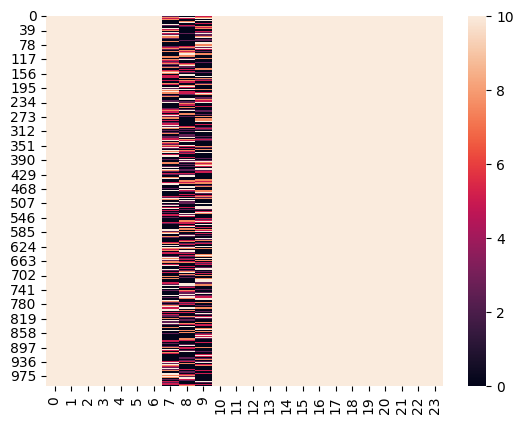

In [ ]:
sns.heatmap(pd.DataFrame(parameter.X))
plt.show()

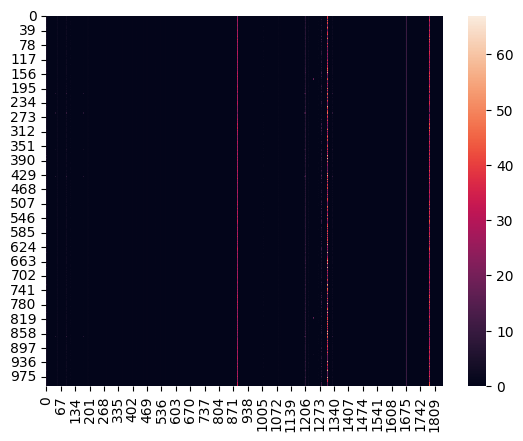

In [ ]:
sns.heatmap(pd.DataFrame(parameter.Y))
plt.show()

# 3° Build different kind of models: mechanistic, neural or hybrid

## 3.1° Mechanistic model: AMN-suitable mechanistic methods alone

This step aims to check if in-house AMN-suitable mechanistic methods reach satisfactory solutions, i.e. solutions that have the same value for the objective reaction set for generating the training set (here, the default objective `BIOMASS_Ecoli_core_w_GAM`), and if the constraints of the metabolic network are well respected: SV=0, V>0, exchange reactions bounds (Vin) respected.

NB: no learning is performed here. We solve each element of the training set independently from each other, with the in-house solvers QP or LP.

Import required functions

In [ ]:
from Library.Build_Model import *

Set the parameters for your mechanistic methods.

In [ ]:
# Run Mechanistic model (no training) QP (quadratic program) or LP (linear program)
# using E. coli core simulation training sets and EB (or UB) bounds

# What you can change
seed = 10
np.random.seed(seed=seed)

trainname = 'iLC858_core_with_varmed_UB_50'
# trainname = 'e_coli_core_UB_50' # the training set file name (generated at previous step)


size = 5 # number of runs must be lower than the number of element in trainname
# timestep = int(1.0e4) # LP 1.0e4 QP 1.0e5
timestep = int(1e4)
learn_rate = 1.0 # for LP: 0.3; for QP: 1.0
decay_rate = 0.9 # only in QP, 0.9
solver = 'MM_QP' # choose between MM_LP or MM_QP
# End of What you can change

# Create model and run GD for X and Y randomly drawn from trainingfile
trainingfile = DIRECTORY+'Dataset_model/'+trainname
model = Neural_Model(trainingfile = trainingfile,
              objective=['bio1'], #
              # objective=['BIOMASS_Ecoli_core_w_GAM'],
              model_type = solver,
              timestep = timestep,
              learn_rate = learn_rate,
              decay_rate = decay_rate)
# Prints a summary of the model before running

model.printout()

training file: /content/drive/My Drive/Github/amn_release/Dataset_model/iLC858_core_with_varmed_UB_50
model type: MM_QP
model scaler: 0.0
model input dim: 24
model output dim: 1
model medium bound: UB
timestep: 10000
training set size (50, 24) (50, 1)


In [ ]:
def printout(V, Stats, model):
    # printing Stats
    print("R2 = %.2f (+/- %.2f) Constraint = %.2f (+/- %.2f)" % \
          (Stats.train_objective[0], Stats.train_objective[1],
           Stats.train_loss[0], Stats.train_loss[1]))
    Vout = tf.convert_to_tensor(np.float32(model.Y))
    Loss_norm, dLoss = Loss_Vout(V, model.Pout, Vout)
    print('Loss Targets', np.mean(Loss_norm))
    Loss_norm, dLoss = Loss_SV(V, model.S)
    print('Loss SV', np.mean(Loss_norm))
    Vin = tf.convert_to_tensor(np.float32(model.X))
    Pin = tf.convert_to_tensor(np.float32(model.Pin))
    if Vin.shape[1] == model.S.shape[1]: # special case
        Vin  = tf.linalg.matmul(Vin, tf.transpose(Pin), b_is_sparse=True)
    # Loss_norm, dLoss = Loss_Vin(V, model.Pin, Vin, model.mediumbound)
    # print('Loss Vin bound', np.mean(Loss_norm))
    Loss_norm, dLoss = Loss_Vpos(V, model)
    print('Loss V positive', np.mean(Loss_norm))


# Runs the appropriate method

if model.model_type is 'MM_QP':
    Ypred, Stats = MM_QP(model, verbose=True)
if model.model_type is 'MM_LP':
    Ypred, Stats = MM_LP(model, verbose=True)

# Printing results
printout(Ypred, Stats, model)

<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:25: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:25: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-18-b64d16e95ffb>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model.model_type is 'MM_QP':


QP-Loss 1 0.28201076 0.05463165
QP-Loss 10 0.07464449 0.014399821
QP-Loss 100 0.0008570422 8.5015294e-05
QP-Loss 1000 0.0004859561 2.0299844e-05
QP-Loss 2000 0.00044702456 1.6867336e-05
QP-Loss 3000 0.00042072163 1.4721731e-05
QP-Loss 4000 0.00040074586 1.32409405e-05
QP-Loss 5000 0.00038436858 1.2153442e-05
QP-Loss 6000 0.00037023518 1.1314047e-05
QP-Loss 7000 0.0003576432 1.0639312e-05
QP-Loss 8000 0.00034614708 1.007785e-05
QP-Loss 9000 0.0003355072 9.597411e-06
QP-Loss 10000 0.00032553743 9.176807e-06
AMN output shapes for PoutV, SV, PinV, Vpos, V, outputs (50, 1) (50, 1) (50, 1) (50, 1) (50, 1849) (50, 3702)
R2 = 1.00 (+/- 0.00) Constraint = 0.00 (+/- 0.00)
Loss Targets 4.178405e-05
Loss SV 0.036032904
Loss V positive 0.0018624641


<ipython-input-18-b64d16e95ffb>:25: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model.model_type is 'MM_LP':


## 3.2° Neural: classical Artificial Neural Networks (ANN)

This step aims to use classical neural networks for learning on the cobrapy-generated dataset, looking at the performance of a pure black-box without any computation using the stoichiometric matrix of the network or other 'knowledge'.

We use a 5-fold cross-validation scheme on 90% of the data and an independent test-set of 10% of the data.

Import required functions

In [ ]:
from Library.Build_Model import *
# We declare this function here and not in the
# function-storing python file to modify it easily
# as it can change the printouts of the methods
def printout(filename, Stats, model, time):
    # printing Stats
    print('Stats for %s CPU-time %.4f' % (filename, time))
    print('R2 = %.4f (+/- %.4f) Constraint = %.4f (+/- %.4f)' % \
          (Stats.train_objective[0], Stats.train_objective[1],
           Stats.train_loss[0], Stats.train_loss[1]))
    print('Q2 = %.4f (+/- %.4f) Constraint = %.4f (+/- %.4f)' % \
          (Stats.test_objective[0], Stats.test_objective[1],
           Stats.test_loss[0], Stats.test_loss[1]))

In [ ]:
# Create, train and evaluate ANN model with FBA simulated training set for E. coli core

# What you can change
seed = 10
ratio_test = 0.1 # part of the training set removed for test
np.random.seed(seed=seed)
# trainname = 'e_coli_core_UB_50'

trainname = 'iLC858_core_with_varmed_UB_50'

# End of What you can change

# Create model
trainingfile = DIRECTORY+'Dataset_model/'+trainname
model = Neural_Model(trainingfile = trainingfile,
              # objective=['BIOMASS_Ecoli_core_w_GAM'],
              objective=['bio1'],
              model_type = 'ANN_Dense',
              n_hidden = 1, hidden_dim = 50,
              epochs = 500, xfold = 5)
ID = np.random.choice(model.X.shape[0],
                      size=int(model.X.shape[0]*ratio_test), replace=False)
Xtest,  Ytest  = model.X[ID,:], model.Y[ID,:]
Xtrain, Ytrain = np.delete(model.X, ID, axis=0), np.delete(model.Y, ID, axis=0)
model.printout()

# Train and evaluate
reservoirname = trainname +'_'+model.model_type
reservoirfile = DIRECTORY+'Reservoir/'+reservoirname
start_time = time.time()
model.X, model.Y = Xtrain, Ytrain
reservoir, pred, stats, _ = train_evaluate_model(model, verbose=False)
delta_time = time.time() - start_time

# Printing cross-validation results
printout(reservoirname, stats, model, delta_time)

# Save, reload and run idependent test set
reservoir.save(reservoirfile)
reservoir.load(reservoirfile)
reservoir.printout()
if len(Xtest) > 0:
    start_time = time.time()
    reservoir.X, reservoir.Y = Xtest, Ytest
    X, Y = model_input(reservoir,verbose=False)
    pred, stats = evaluate_model(reservoir.model, X, Y, reservoir, verbose=False)
    delta_time = time.time() - start_time
    printout('Test set', stats, model, delta_time)

training file: /content/drive/My Drive/Github/amn_release/Dataset_model/iLC858_core_with_varmed_UB_50
model type: ANN_Dense
model scaler: 0.0
model input dim: 24
model output dim: 1
model medium bound: UB
timestep: 0
training set size (50, 24) (50, 1)
nbr hidden layer: 1
hidden layer size: 50
activation function: relu
training epochs: 500
training regression: True
training learn rate: 0.001
training dropout: 0.25
training batch size: 5
training validation iter: 0
training xfold: 5
training early stopping: False
nbr parameters: 1301
---------- 1
---------- 1
train = 0.83 test = 0.86 loss-train = -1.000000 loss-test = -1.000000 iter=0
nbr parameters: 1301
---------- 1
---------- 1
train = 0.81 test = 0.75 loss-train = -1.000000 loss-test = -1.000000 iter=0
nbr parameters: 1301
---------- 1
---------- 1
train = 0.84 test = 0.87 loss-train = -1.000000 loss-test = -1.000000 iter=0
nbr parameters: 1301
---------- 1
---------- 1
train = 0.87 test = 0.82 loss-train = -1.000000 loss-test = -1.0

NB: a Constraint=-1.00 is expected with such black box architecture, it is the default value when no constraint is computed.

With the given parameters we should obtain Q2=0.68 on the test set.

## 3.3° Hybrid: Artificial Metabolic Network (AMN) architecture

This step aims to use an AMN architecture for learning on the cobrapy-generated dataset, looking at the performance of a hybrid model with computations using the stoichiometric matrix of the network and other 'knowledge'.

We use a 5-fold cross-validation scheme on 90% of the data and an independent test-set of 10% of the data.

Import required functions

In [ ]:
from Library.Build_Model import *

# We declare this function here and not in the
# function-storing python file to modify it easily
# as it can change the printouts of the methods
def printout(filename, Stats, model, time):
    # printing Stats
    print('Stats for %s CPU-time %.4f' % (filename, time))
    print('R2 = %.4f (+/- %.4f) Constraint = %.4f (+/- %.4f)' % \
          (Stats.train_objective[0], Stats.train_objective[1],
           Stats.train_loss[0], Stats.train_loss[1]))
    print('Q2 = %.4f (+/- %.4f) Constraint = %.4f (+/- %.4f)' % \
          (Stats.test_objective[0], Stats.test_objective[1],
           Stats.test_loss[0], Stats.test_loss[1]))

In [ ]:
# Create, train and evaluate AMN_QP o models with FBA simulated training set for E. coli core
# with EB or UB with a mechanistic layer

# What you can change
seed = 10
ratio_test = 0.1 # part of the training set removed for test
np.random.seed(seed=seed)
# trainname = 'e_coli_core_UB_50' # can change EB by UB
trainname = 'iLC858_core_with_varmed_UB_50'

timestep = 4
# End of What you can change

# Create model 90% for training 10% for testing
trainingfile = DIRECTORY+'Dataset_model/'+trainname
model = Neural_Model(trainingfile = trainingfile,
                     # objective=['BIOMASS_Ecoli_core_w_GAM'],
                     objective=['bio1'],
                     model_type='AMN_QP',
                     timestep = timestep, learn_rate=1.0,
                     scaler=True,
                     n_hidden = 2, hidden_dim = 25,
                     epochs=500, xfold=5,
                     verbose=True)
ID = np.random.choice(model.X.shape[0],
                      size=int(model.X.shape[0]*ratio_test), replace=False)
Xtest,  Ytest  = model.X[ID,:], model.Y[ID,:]
Xtrain, Ytrain = np.delete(model.X, ID, axis=0), np.delete(model.Y, ID, axis=0)
model.printout()

# Train and evaluate
reservoirname = trainname+'_'+model.model_type
reservoirfile = DIRECTORY+'Reservoir/'+reservoirname
start_time = time.time()
model.X, model.Y = Xtrain, Ytrain
reservoir, pred, stats, _ = train_evaluate_model(model, verbose=False)
delta_time = time.time() - start_time

# Printing cross-validation results
printout(reservoirname, stats, model, delta_time)

# Save, reload and run idependent test set
reservoir.save(reservoirfile)
reservoir.load(reservoirfile)
reservoir.printout()
if len(Xtest) > 0:
    start_time = time.time()
    reservoir.X, reservoir.Y = Xtest, Ytest
    X, Y = model_input(reservoir, verbose=False)
    pred, stats = evaluate_model(reservoir.model, X, Y, reservoir, verbose=False)
    delta_time = time.time() - start_time
    printout('Test set', stats, model, delta_time)

NameError: ignored

With the given parameters the AMN should outperform the ANN and get to 0.93 of Q2. Moreover, it should comply with the constraints of the metabolic network, obtaining an aggregated constraint (see research paper or source code) of roughly 0.001.

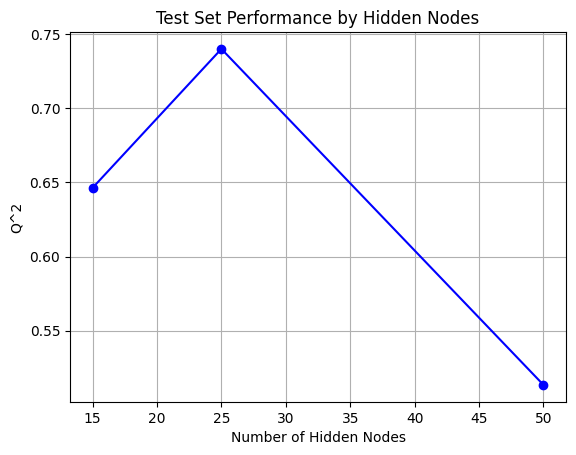

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace this with your own data
num_hidden_nodes = [15, 25, 50]
q_squared_values = [0.6463, 0.74, 0.5134]

# Create a line plot
plt.plot(num_hidden_nodes, q_squared_values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Q^2')
plt.title('Test Set Performance by Hidden Nodes')

# Show the plot
plt.grid(True)
plt.show()
